# Digital Image Processing - Assignment 3

**Imports**

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

### 1. Ambitious Jo

In [2]:
img = cv2.imread('../imgs/answerKey.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img[:,:,0]
img = img>240
img = img.astype(int)
img = img*255

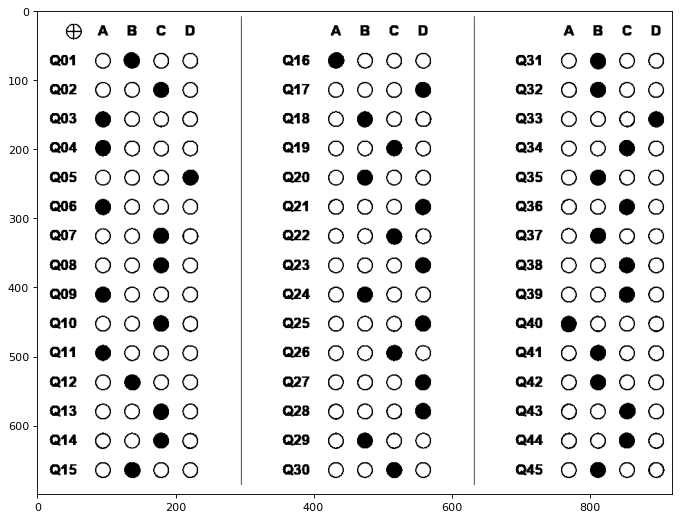

In [3]:
figure(figsize=(12, 8), dpi=80)

demn = img[740:1440, 140:1060]
plt.imshow(demn, cmap='gray')
plt.show()

In [4]:
hoe1 = np.full((25, 25, 3), 255)

for x in range(25):
    for y in range(25):
        if (x-12)**2 + (y-12)**2 < 122:
            hoe1[x,y,:] = 0
        elif (x-12)**2 + (y-12)**2 < 170:
            hoe1[x,y,:] = -1
        
hoe1 = hoe1[:,:,0]

[d0, d1] = demn.shape
[f0, f1] = hoe1.shape
ans = []

for x in range(d0):
    for y in range(d1):
        
        if f0+x-1<d0 and f1+y-1<d1:
            
            flg=0
            
            for xx in range(f0):
                for yy in range(f1):
                    
                    if hoe1[xx,yy]==-1:
                        continue
                        
                    elif hoe1[xx,yy]!=demn[x+xx, y+yy]:
                        flg=1
                        break
                        
            if flg==0:
                ans.append([x, y])
                
ans = sorted(ans, key = ans.count, reverse = True)

In [5]:
boy = np.array(ans)

b = [None, None]
bb = [[], []]

for i in range(2): 
    b[i] = list(boy[:,i])
    b[i] = sorted(b[i], key = b[i].count, reverse = True)

bb = [[], []]

for idx in range(2):
    for i in b[idx]:
        flg = 0
        for j in bb[idx]:
            if abs(i-j)<=5:
                flg=1
        if flg==0:
            bb[idx].append(i)
    bb[idx].sort()
    
cart_prod = [(a,b) for a in bb[0] for b in bb[1]]
cart_prod = np.array(cart_prod, dtype="i,i")
cart_prod = cart_prod.reshape(45, 4)
aa = [None, None, None]
for i in range(3):
    aa[i] = list(range(i,45,3))
    aa[i] = cart_prod[aa[i]]
cart_prod = np.concatenate((aa[0], aa[1], aa[2]), axis = 0)

print('Pixel locations for the options for each question:')
print(cart_prod)

Pixel locations for the options for each question:
[[( 60,  83) ( 60, 125) ( 60, 167) ( 60, 209)]
 [(103,  83) (103, 125) (103, 167) (103, 209)]
 [(145,  83) (145, 125) (145, 167) (145, 209)]
 [(187,  83) (187, 125) (187, 167) (187, 209)]
 [(230,  83) (230, 125) (230, 167) (230, 209)]
 [(272,  83) (272, 125) (272, 167) (272, 209)]
 [(314,  83) (314, 125) (314, 167) (314, 209)]
 [(356,  83) (356, 125) (356, 167) (356, 209)]
 [(399,  83) (399, 125) (399, 167) (399, 209)]
 [(441,  83) (441, 125) (441, 167) (441, 209)]
 [(483,  83) (483, 125) (483, 167) (483, 209)]
 [(526,  83) (526, 125) (526, 167) (526, 209)]
 [(568,  83) (568, 125) (568, 167) (568, 209)]
 [(610,  83) (610, 125) (610, 167) (610, 209)]
 [(653,  83) (653, 125) (653, 167) (653, 209)]
 [( 60, 420) ( 60, 462) ( 60, 504) ( 60, 546)]
 [(103, 420) (103, 462) (103, 504) (103, 546)]
 [(145, 420) (145, 462) (145, 504) (145, 546)]
 [(187, 420) (187, 462) (187, 504) (187, 546)]
 [(230, 420) (230, 462) (230, 504) (230, 546)]
 [(272, 4

In [6]:
answer_key = {}

def qna(spot):
    
    qn  = -1
    opt = -1
    cur = 1e5
    
    for idx1, i in enumerate(cart_prod):
        for idx2, j in enumerate(i):
            if abs(j[0]-spot[0])+abs(j[1]-spot[1])<cur:
                qn=idx1+1
                opt=idx2+1
                cur=abs(j[0]-spot[0])+abs(j[1]-spot[1])
    
    answer_key[qn] = opt    

In [7]:
fin_ans = []

for i in ans:
    flg=0
    for j in fin_ans:
        if abs(i[0]-j[0])<=10 and abs(i[1]-j[1])<=10:
            flg=1
    if flg==0:
        fin_ans.append(i)
        
for i in fin_ans:
    qna(i)
    
answer_key = dict(sorted(answer_key.items()))
print('Answer key:')
print(answer_key)

Answer key:
{1: 2, 2: 3, 3: 1, 4: 1, 5: 4, 6: 1, 7: 3, 8: 3, 9: 1, 10: 3, 11: 1, 12: 2, 13: 3, 14: 3, 15: 2, 16: 1, 17: 4, 18: 2, 19: 3, 20: 2, 21: 4, 22: 3, 23: 4, 24: 2, 25: 4, 26: 3, 27: 4, 28: 4, 29: 2, 30: 3, 31: 2, 32: 2, 33: 4, 34: 3, 35: 2, 36: 3, 37: 2, 38: 3, 39: 3, 40: 1, 41: 2, 42: 2, 43: 3, 44: 3, 45: 2}


### 2. Creed’s Side Gig

In [8]:
def find(i, p): 
    if p[i]==i:
        return i
    else:
        p[i] = find(p[i], p)
        return p[i]

def join(a, b , p, s):
    a = find(a,p);
    b = find(b,p);
    if (a != b) :
        if (s[a] < s[b]):
            a = a^b
            b = a^b
            a = a^b
        p[b]=a
        if (s[a]==s[b]):
            s[a]+=1

In [9]:
def two_pass_algorithm(img):
    
    cnt = -1
    l = img.shape[0]
    b = img.shape[1]
    p = [i for i in range(l*b)]
    s = [1 for i in range(l*b)]
    labels = np.full((l, b), -1)
    
    for i in range(l):
        for j in range(b):
            
            if(img[i,j]!=0):
                
                flg=0

                if(i>0 and j>0):
                    if(labels[i,j-1]!=-1 and labels[i-1,j]!=-1):
                        join(labels[i,j-1],labels[i-1,j],p,s)
                        labels[i,j] = labels[i,j-1]
                    elif (labels[i,j-1]==-1 and labels[i-1,j]!=-1): labels[i,j] = labels[i-1,j]
                    elif(labels[i,j-1]!=-1 and labels[i-1,j]==-1): labels[i,j] = labels[i,j-1]
                    else: flg=1

                elif(i>0):
                    if(labels[i-1,j]!=-1): labels[i,j] = labels[i-1,j]
                    else: flg=1
                
                elif(j>0):
                    if(labels[i,j-1]!=-1): labels[i,j] = labels[i,j-1]
                    else: flg=1
                
                else:
                    cnt = cnt+1
                    labels[i,j]=cnt
                    p[cnt]=cnt
                    s[cnt]=1
                    
                if flg==1:
                    cnt = cnt+1
                    labels[i,j]=cnt
                    p[cnt]=cnt
                    s[cnt]=1
    
    
    for i in range(l):
        for j in range(b):
            if(labels[i,j]!=-1):
                labels[i,j] = find(labels[i,j], p)
                
    return labels

In [10]:
def threshold(img):
    
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    
    img = np.logical_or(img[:,:,0]>222, img[:,:,1]>177)
    img = img.astype(int)
    img = img*255

    colors = {}
    labels = two_pass_algorithm(img)
    l = labels.shape[0]
    b = labels.shape[1]
    final = np.zeros((l, b, 3))

    for i in range(l):
        for j in range(b):
            label = labels[i,j]
            if(label != -1):
                if label not in colors.keys():
                    colors[label] = (np.random.randint(50,200,3))
                final[i,j,0] = colors[label][0]
                final[i,j,1] = colors[label][1]
                final[i,j,2] = colors[label][2]
            else:
                final[i,j,:] = 0
                
    ax[1].imshow(final.astype(np.int32))
    ax[1].set_title('Expected Image')
    f.tight_layout()
    plt.show()     

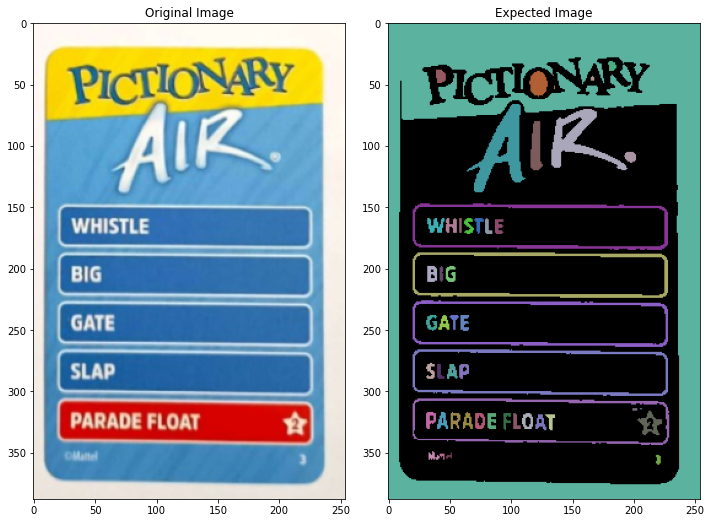

In [11]:
img = cv2.imread('../imgs/pictionary.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
threshold(img)

### 3. Color Operations

**Median Filtering**

In [12]:
def padded_img(img, k):
    [ogh, ogw] = img.shape
    sz = k//2
    gg = np.zeros((img.shape[0] + 2*sz, img.shape[1] + 2*sz))
    gg[sz:sz+ogh,sz:sz+ogw] = img
    return gg

def median_filter(img, k):
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.median(img[x:x+k,y:y+k])
    res = res.astype(np.uint8)
    return res

def median_rgb(img,k):
    final_image = np.zeros(img.shape)
    final_image[:,:,0] = median_filter(img[:,:,0], k)
    final_image[:,:,1] = median_filter(img[:,:,1], k)
    final_image[:,:,2] = median_filter(img[:,:,2], k)
    return final_image.astype(np.int32)

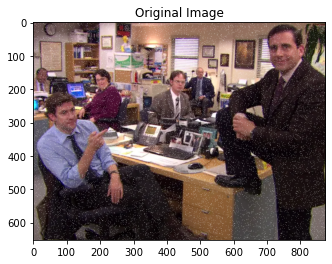

In [13]:
img = cv2.imread('../imgs/salt.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.show()

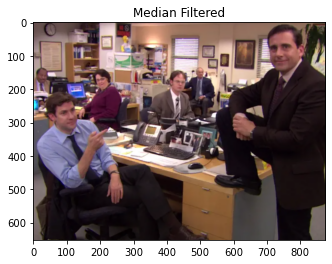

In [14]:
img = median_rgb(img, 3)
plt.imshow(img)
plt.title('Median Filtered')
plt.show()

**Contrast stretching**

In [15]:
def contrast_stretching(img, low, high):
    img = img.astype(np.float64)
    mn = np.min(img)
    mx = np.max(img)
    img = low + (img-mn)/(mx-mn)*(high-low)
    img = img.astype(int)
    return img

def contrast_rgb(img, low, high):
    if low<0 or high>255:
        print('Invalid Range')
    final_image = np.zeros(img.shape)
    final_image[:,:,0] = contrast_stretching(img[:,:,0], low, high)
    final_image[:,:,1] = contrast_stretching(img[:,:,1], low, high)
    final_image[:,:,2] = contrast_stretching(img[:,:,2], low, high)
    return final_image.astype(np.uint8)

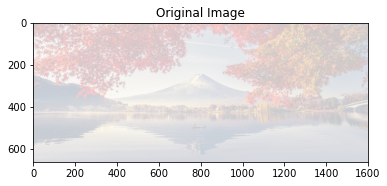

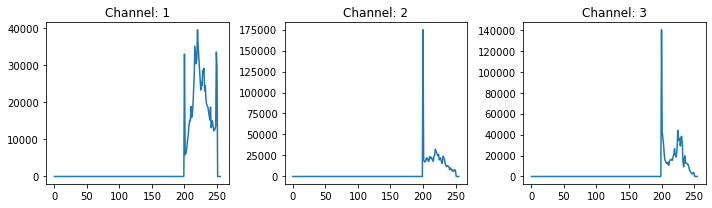

In [16]:
img = cv2.imread('../imgs/landscape.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.uint8)
plt.imshow(img)
plt.title('Original Image')
plt.show()

f, ax = plt.subplots(1, 3, figsize=(10,3))
for i in range(3):
    histr = cv2.calcHist([img[:,:,i]],[0],None,[256],[0,256])
    ax[i].plot(histr)
    ax[i].set_title(f"Channel: {i+1}")
f.tight_layout()
plt.show()

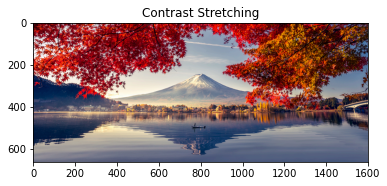

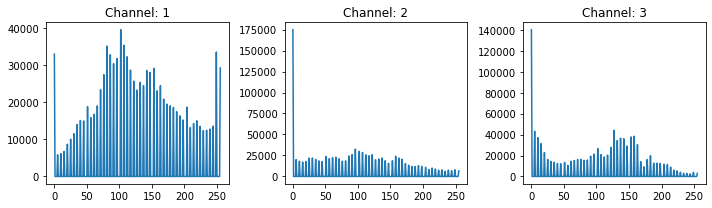

In [17]:
img = contrast_rgb(img, 0, 255)
plt.imshow(img)
plt.title('Contrast Stretching')
plt.show()

f, ax = plt.subplots(1, 3, figsize=(10,3))
for i in range(3):
    histr = cv2.calcHist([img[:,:,i]],[0],None,[256],[0,256])
    ax[i].plot(histr)
    ax[i].set_title(f"Channel: {i+1}")
f.tight_layout()
plt.show()

**Histogram Equilization**

In [18]:
def histogram_equilization(im):

    im = im.astype(float)
    im = im-np.min(im)
    im = 255*im/np.max(im)
    im = im.astype(np.uint8)
    
    unique, counts = np.unique(im, return_counts=True)
    a = dict(zip(unique, counts))
    
    prob = 0
    transformed_img = {}
    tot = im.shape[0]*im.shape[1]

    for i in range(256):
        if i in a.keys():
            prob = prob + a[i]/tot
        transformed_img[i] = 255*prob
    
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            im[x][y] = transformed_img[im[x][y]]
            
    return im

def histogram_rgb(img):
    final_image = np.zeros(img.shape)
    final_image[:,:,0] = histogram_equilization(img[:,:,0])
    final_image[:,:,1] = histogram_equilization(img[:,:,1])
    final_image[:,:,2] = histogram_equilization(img[:,:,2])
    return final_image.astype(np.uint8)

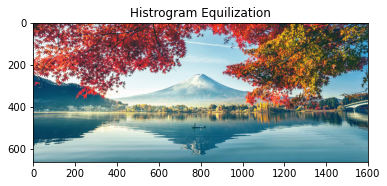

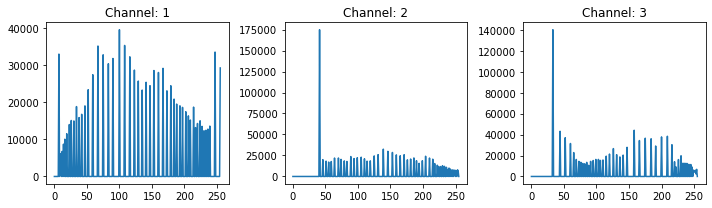

In [19]:
img = histogram_rgb(img)
plt.imshow(img)
plt.title('Histrogram Equilization')
plt.show()

f, ax = plt.subplots(1, 3, figsize=(10,3))
for i in range(3):
    histr = cv2.calcHist([img[:,:,i]],[0],None,[256],[0,256])
    ax[i].plot(histr)
    ax[i].set_title(f"Channel: {i+1}")
f.tight_layout()
plt.show()

**Vintage Effect**

In [20]:
def Vintage(img):
    img = img.astype(float)
    new_r = 0.293*img[:,:,0] + 0.769*img[:,:,1] + 0.210*img[:,:,2]
    new_g = 0.249*img[:,:,0] + 0.686*img[:,:,1] + 0.188*img[:,:,2]
    new_b = 0.172*img[:,:,0] + 0.534*img[:,:,1] + 0.151*img[:,:,2]
    img[:,:,0] = np.clip(new_r, a_min = 0, a_max = 255)
    img[:,:,1] = np.clip(new_g, a_min = 0, a_max = 255)
    img[:,:,2] = np.clip(new_b, a_min = 0, a_max = 255)
    return img.astype(np.int32)

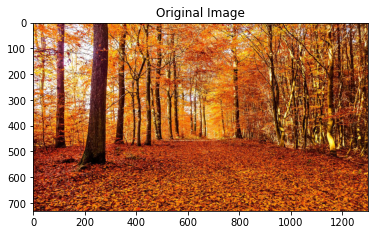

In [21]:
img = cv2.imread('../imgs/Q3_vintage.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.show()

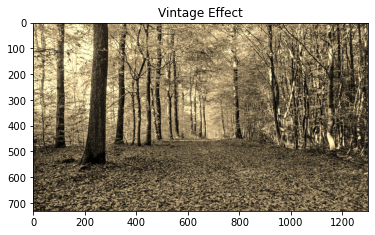

In [22]:
plt.imshow(Vintage(img))
plt.title('Vintage Effect')
plt.show()

**Matrix Effect**

In [23]:
def Matrix(img):
    img = img.astype(float)
    new_r = ((img[:,:,0]/255)**(3/2))*255
    new_g = ((img[:,:,1]/255)**(4/5))*255
    new_b = ((img[:,:,2]/255)**(3/2))*255
    img[:,:,0] = np.clip(new_r, a_min = 0, a_max = 255)
    img[:,:,1] = np.clip(new_g, a_min = 0, a_max = 255)
    img[:,:,2] = np.clip(new_b, a_min = 0, a_max = 255)
    return img.astype(np.int32)

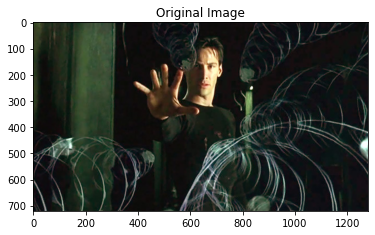

In [24]:
img = cv2.imread('../imgs/Q3_matrix.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.show()

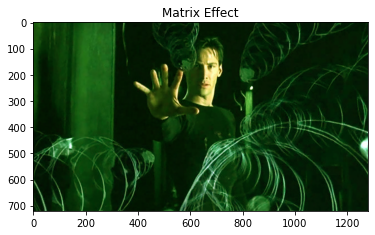

In [25]:
plt.imshow(Matrix(img))
plt.title('Matrix Effect')
plt.show()

**Vignetting**

In [26]:
def create_gaussian_kernel(k,sigma):
    x = np.linspace(-(k//2), k//2, num=k)
    x = np.exp(-(x*x)/(2*sigma))/(sigma*np.sqrt(2*np.pi))
    x = x/np.sum(x)
    return x

def Vignette(img,sigma):
    img = img.astype(float)
    A = np.array([create_gaussian_kernel(img.shape[0], sigma)])
    B = np.array([create_gaussian_kernel(img.shape[1],sigma)])
    K = A.T @ B
    K = K/np.max(K)
    img[:,:,0] = img[:,:,0]*K
    img[:,:,1] = img[:,:,1]*K
    img[:,:,2] = img[:,:,2]*K
    img = img.astype(np.uint8)
    return img

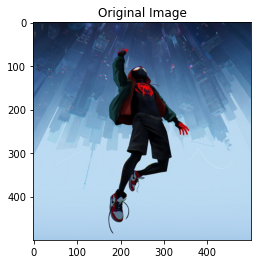

In [27]:
img = cv2.imread('../imgs/Q3_vignetting.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.show()

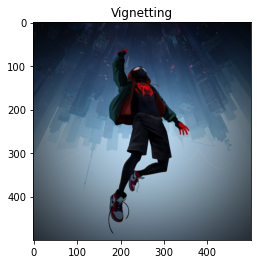

In [28]:
plt.imshow(Vignette(img, 42000))
plt.title('Vignetting')
plt.show()

**Duo-Tone Effect**

In [29]:
def exp(channel, gamma):
    table = [i**gamma for i in np.arange(0, 256)]
    table = np.clip(table, a_min=0, a_max=255)
    table = np.array(table, dtype=np.uint8)
    channel = cv2.LUT(channel, table)
    return channel

def duotone(img, number):
    for i in range(3):
        if i == number:
            img[:,:,i] = exp(img[:,:,i], 1.05)
        else:
            img[:,:,i] = 0
    return img

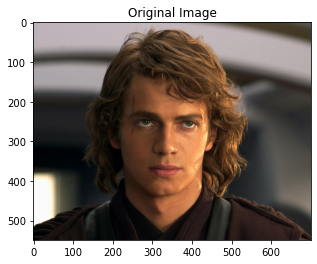

In [30]:
img = cv2.imread('../imgs/Q3_duotone.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.show()

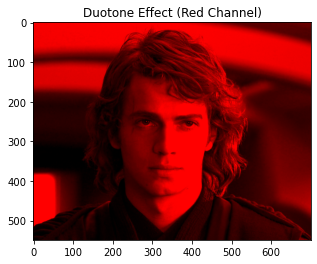

In [31]:
plt.imshow(duotone(img, 0))
plt.title('Duotone Effect (Red Channel)')
plt.show()

### 4. Realistic Systems

**4.1 Image Rotation**

In [32]:
def imrotate(img, theta, retainAllPixels):
    
    theta = theta/180 * np.pi
    pivot_x = img.shape[1]//2
    pivot_y = img.shape[0]//2
    
    rotation_mat = [[np.cos(theta), -np.sin(theta)], 
                    [np.sin(theta),  np.cos(theta)]]
    rotation_mat = np.array(rotation_mat, dtype=np.float64)
    rotation_mat = np.transpose(rotation_mat) # why did we take transpose
    
    scale = 1
    
    if retainAllPixels==True:
        for y in [0, img.shape[0]-1]:
            for x in [0, img.shape[1]-1]:
                coords = [[x-pivot_x], [y-pivot_y]]
                coords = np.array(coords, dtype=np.float64)
                rotate_mat = rotation_mat @ coords
                new_x = int(rotate_mat[0])
                new_y = int(rotate_mat[1])
                scale = max(scale, abs(new_x)/pivot_x)
                scale = max(scale, abs(new_y)/pivot_y)
    
    h = img.shape[0]
    w = img.shape[1]
    new_img = np.zeros(img.shape, dtype=np.uint8)
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            
            coords = [[x-pivot_x], [y-pivot_y]]
            coords = np.array(coords, dtype=np.float64)

            rotate_mat = rotation_mat @ coords
            rotate_mat = rotate_mat/scale
            new_x = pivot_x + int(rotate_mat[0])
            new_y = pivot_y + int(rotate_mat[1])

            if 0 <= new_x and new_x < img.shape[1]:
                if 0 <= new_y and new_y < img.shape[0]:
                    new_img[new_y, new_x] = img[y, x]

    return new_img

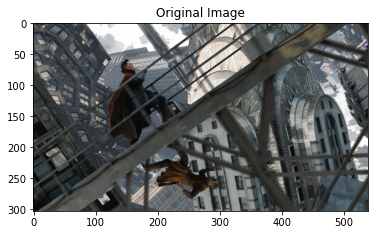

In [33]:
img = cv2.imread('../imgs/Q4_rotation.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (539, 303))
plt.imshow(img)
plt.title('Original Image')
plt.show()

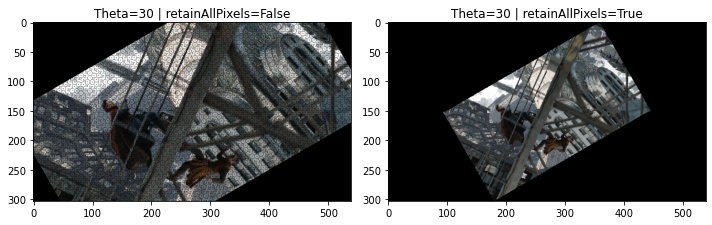

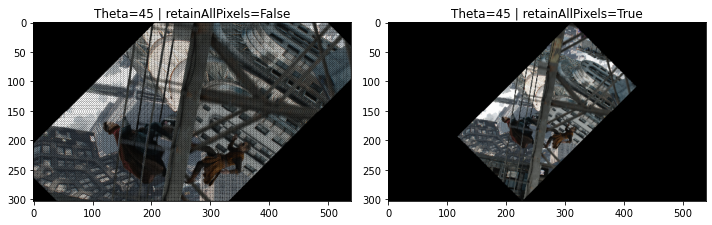

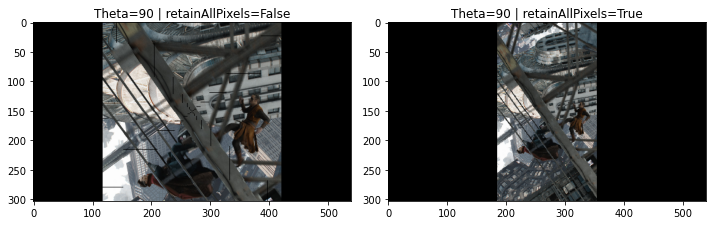

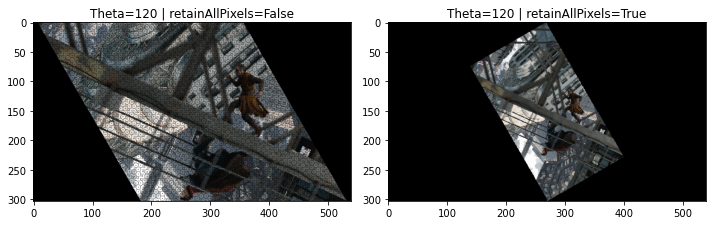

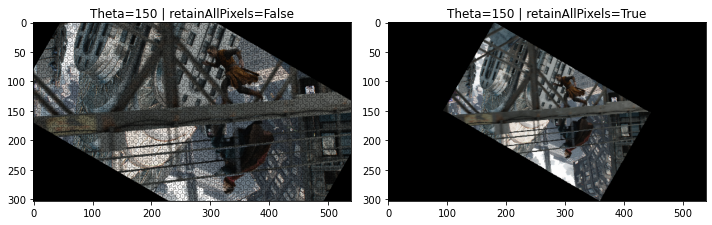

In [34]:
angles = [30, 45, 90, 120, 150]

for theta in angles:
    f, ax = plt.subplots(1, 2, figsize=(10,3))
    for x, b in enumerate([False, True]):
        ax[x].imshow(imrotate(img, theta, b))
        ax[x].set_title(f'Theta={theta} | retainAllPixels={b}')
    f.tight_layout()
    plt.show()

**Checking the inverse operation**

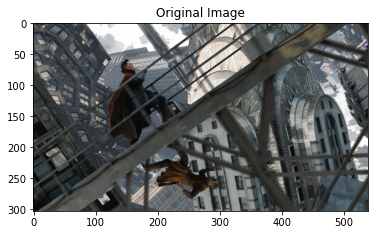

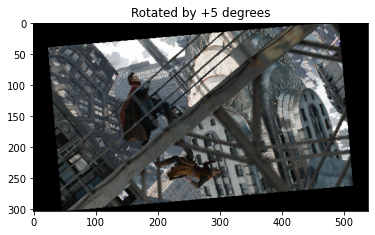

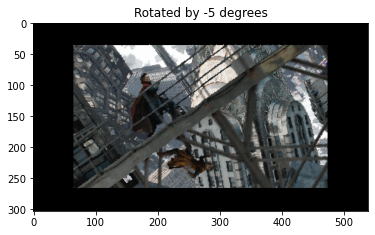

In [35]:
img = cv2.imread('../imgs/Q4_rotation.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (539, 303))
plt.imshow(img)
plt.title('Original Image')
plt.show()

im1 = imrotate(img, 5, True)
plt.title('Rotated by +5 degrees')
plt.imshow(im1)
plt.show()

im2 = imrotate(im1, -5, True)
plt.title('Rotated by -5 degrees')
plt.imshow(im2)
plt.show()

### 4.2 Hough Transform

In [36]:
def padded_img(img, k):
    
    [ogh, ogw] = img.shape
    sz = k//2
    gg = np.zeros((img.shape[0] + 2*sz, img.shape[1] + 2*sz))
    gg[sz:sz+ogh,sz:sz+ogw] = img
    return gg


def gradient_convolve(img, kernel):
    
    k = kernel.shape[0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.sum(img[x:x+k,y:y+k]*kernel)
    
    res = res.astype(np.float64)
    return res


def edge_detection(im):
    
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    
    gx = gradient_convolve(im, prewitt_x)
    gy = gradient_convolve(im, prewitt_y)
    
    return gx, gy

In [37]:
def hough_lines(img, temp, cnt):
    
    gx, gy = edge_detection(temp)
    tr = {}
    angles = np.linspace(0, 180, 180)
    angles = angles.astype(int)
    wh = np.zeros((181, 2*int(np.sqrt(img.shape[0]**2+img.shape[1]**2))+1))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j]==0):
                x = j
                y = img.shape[0]-i
                myradians = math.atan2(gy[i,j], gx[i,j])
                deg = (int((myradians*180)/np.pi)+180)%180
                ro = int(x*np.cos((deg/180)*np.pi) + y*np.sin((deg/180)*np.pi))
                if (deg, ro) not in tr:
                    tr[(deg, ro)]=0
                tr[(deg, ro)]+=1
                wh[deg, ro+img.shape[1]]+=1
    sorted_tr = {key: value for key, value in sorted(tr.items(), key=lambda item: item[1], reverse=True)}
    
    fin = []
    for key, value in sorted_tr.items():
        flg=0
        for gg in fin:
            if abs(gg[0]-key[0])+abs(gg[1]-key[1])<50:
                flg=1
        if flg==0:
            fin.append(key)
    fin = fin[:cnt]
    
    print("Plotting the images with the lines marked")
    for c in fin:
        gg = np.array(temp)
        deg, ro = c
        theta = deg/180*np.pi
        x1 = 0
        x2 = img.shape[1]-1
        y1 = int(img.shape[0]-(ro-x1*np.cos(theta))/np.sin(theta))
        y2 = int(img.shape[0]-(ro-x2*np.cos(theta))/np.sin(theta))
        cv2.line(gg, (x1, y1), (x2, y2), (0, 255, 0), thickness=5)
        plt.imshow(gg, cmap='gray')
        plt.show()
    
    gph = np.array(wh)
    figure(figsize=(15, 10), dpi=80)
    gph = gph.astype(np.float64)
    gph = gph/np.max(gph)
    gph = gph*500
    gph = np.clip(gph, a_min=0, a_max=255)
    gph = gph.astype(int)
    print('Plotting the corresponding points in the Hough Transform parameter space')
    plt.imshow(gph, cmap='gray')
    plt.show()
    
    return fin

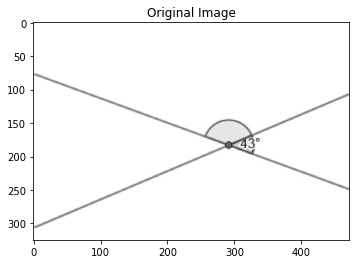

Plotting the images with the lines marked


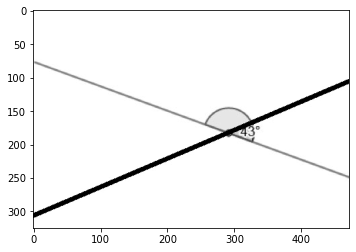

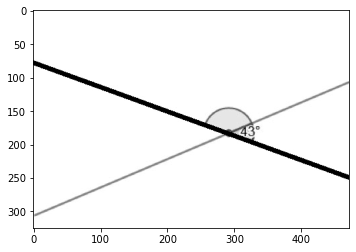

Plotting the corresponding points in the Hough Transform parameter space


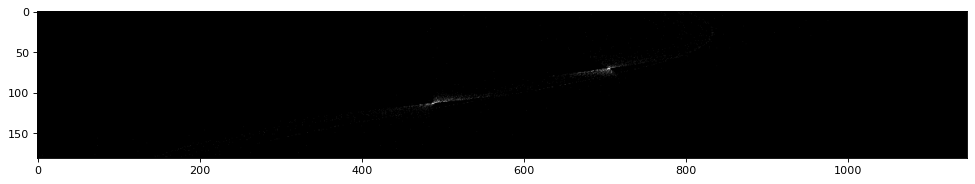

In [38]:
og_img = cv2.imread('../imgs/Q4_hough.jpg', 0)
img = cv2.imread('../imgs/Q4_hough.jpg', 0)
img = img>180
img = img.astype(np.uint8)
img = img*255
plt.imshow(og_img, cmap='gray')
plt.title('Original Image')
plt.show()

mb = hough_lines(img, og_img, 2)

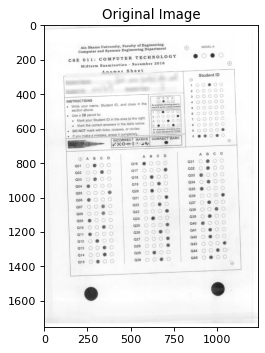

Plotting the images with the lines marked


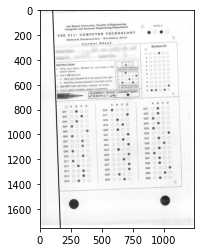

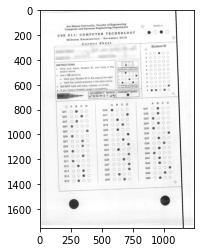

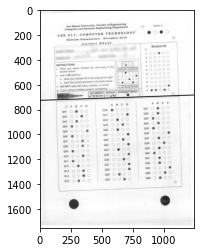

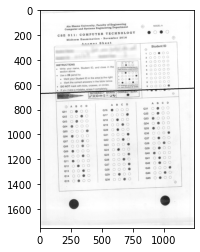

Plotting the corresponding points in the Hough Transform parameter space


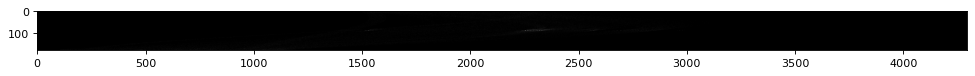

In [39]:
og_img = cv2.imread('../imgs/rotatedOMR1.png', 0)
img = np.array(og_img)
img = img>180
img = img.astype(np.uint8)
img = img*255
figure(figsize=(8, 5), dpi=80)
plt.imshow(og_img, cmap='gray')
plt.title('Original Image')
plt.show()

mb = hough_lines(img, og_img, 4)

In [40]:
def fix_omr(img):
    
    gx, gy = edge_detection(img)
    tr = {}
    angles = np.linspace(0, 180, 180)
    angles = angles.astype(int)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j]<=180):
                x = j
                y = img.shape[0]-i
                myradians = math.atan2(gy[i,j], gx[i,j])
                deg = (int((myradians*180)/np.pi)+180)%180
                ro = int(x*np.cos((deg/180)*np.pi) + y*np.sin((deg/180)*np.pi))
                if (deg, ro) not in tr:
                    tr[(deg, ro)]=0
                tr[(deg, ro)]+=1
    
    sorted_tr = {key: value for key, value in sorted(tr.items(), key=lambda item: item[1], reverse=True)}
    th = list(sorted_tr.keys())[0][0]
    if (th>90):
        th-=180
    
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(imrotate(img, -th, False), cmap='gray')
    ax[1].set_title(f'Rotated by {-th}°')
    plt.show()

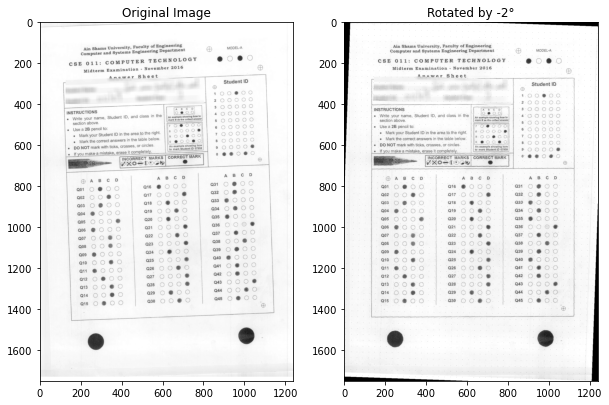

In [41]:
img = cv2.imread('../imgs/rotatedOMR1.png', 0)
fix_omr(img)

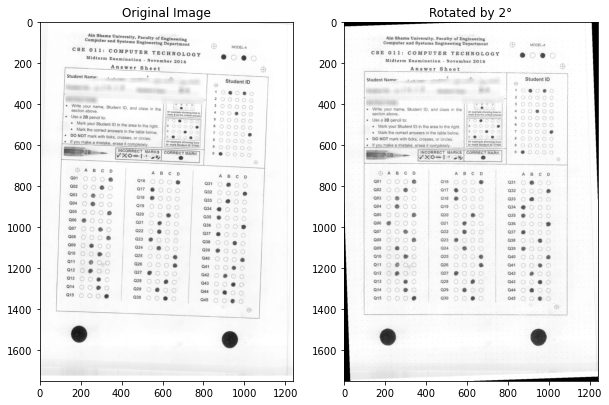

In [42]:
img = cv2.imread('../imgs/rotatedOMR2.png', 0)
fix_omr(img)

### 5. More Morphology

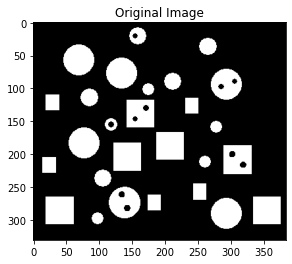

In [43]:
img = cv2.imread('../imgs/shapes.png', 0)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

In [44]:
vis = np.zeros((img.shape))

color=0
n = img.shape[0]
m = img.shape[1]

def dfs(x, y):
    if (x<0 or x>=n or y<0 or y>=m or img[x][y]==0 or vis[x][y]!=0):
        return
    else:
        vis[x][y]=color
        dfs(x+1, y)
        dfs(x-1, y)
        dfs(x, y+1)
        dfs(x, y-1)
        
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if vis[i][j]==0 and img[i][j]==255:
            color+=1
            dfs(i,j)
            
print(f"Total objects = {color}")

Total objects = 27


In [45]:
def erosion(img, kernel):

    (l,b) = img.shape
    p1 = kernel.shape[0] // 2
    p2 = kernel.shape[1] // 2

    img1 = np.zeros((l + 2*p1 ,b + 2*p2), dtype = np.uint8)
    img1[p1:p1+l, p2:p2+b] = img
    final_image = np.zeros((l,b))
    final_image = final_image.astype(np.uint8)
    kernel = kernel//255

    for i in range(l):
        for j in range(b):
            y = i + p1
            x = j + p2
            window = img1[y-p1:y+p1+1, x-p2:x+p2+1]
            bin_window = window // 255
            mix = np.bitwise_and(bin_window, kernel)
            if (mix == kernel).all():
                final_image[i,j] = 255

    return final_image


def dilation(img,kernel):

    (l,b) = img.shape
    p1 = kernel.shape[0] // 2
    p2 = kernel.shape[1] // 2

    img1 = np.zeros((l + 2*p1 ,b + 2*p2), dtype = np.uint8)
    img1[p1:p1+l, p2:p2+b] = img
    final_image = np.zeros((l,b))
    final_image = final_image.astype(np.uint8)
    kernel = kernel//255

    for i in range(l):
        for j in range(b):
            y = i + p1
            x = j + p2
            window = img1[y-p1:y+p1+1, x-p2:x+p2+1]
            bin_window = window // 255
            mix = np.bitwise_and(bin_window, kernel)
            if (np.sum(mix)>0):
                final_image[i,j] = 255

    return final_image


def opening(img,kernel):
    return dilation(erosion(img, kernel), kernel)


def closing(img,kernel):
    return erosion(dilation(img, kernel), kernel)

Objects with holes: 6


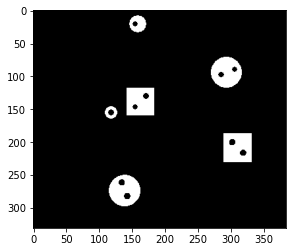

In [46]:
cnt=0
holes = []

def check_hole(t):
    
    global cnt
    output = (vis==t)
    output = output.astype(np.uint8)
    output = output*255
                
    eimg = closing(output, 255*np.ones((7, 7),dtype = np.uint8))

    flag = 0

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if eimg[i][j]==255 and output[i][j]==0:
                flag=1
                
    if flag:
        holes.append(t)
        cnt+=1
        return output
    else:
        return np.zeros(vis.shape)

res = np.zeros(vis.shape)
for i in range(1, color+1):
    res += check_hole(i)
        
print(f"Objects with holes: {cnt}") 
plt.imshow(res, cmap='gray')
plt.show()

In [47]:
rectangles = []

k = 5
kernel = np.full((k,k), 255)
kernel[:,k-1] = 0
kernel[k-1,:] = 0

for i in range(img.shape[0]-k):
    for j in range(img.shape[1]-k):
        if np.array_equal(img[i:i+k,j:j+k], kernel):
            rectangles.append(vis[i+1][j+1])

In [48]:
colors = np.array(list(range(1, 28)), dtype='int')

holes = np.array(holes, dtype='int')
nonholes = np.setxor1d(colors, holes)

rectangles = np.array(rectangles, dtype='int')
circles = np.setxor1d(colors, rectangles)

In [49]:
def plot(label, title):
    
    print(f'Plotting: {title}')
    print(f'Total count: {label.shape[0]}')
    res = np.zeros(vis.shape)
    
    for c in label:
        output = (vis==c)
        output = output.astype(np.uint8)
        output = output*255
        res = res+output
    
    plt.imshow(res, cmap='gray')
    plt.show()

Plotting: circular objects
Total count: 16


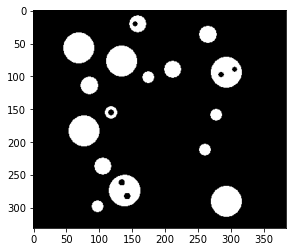

In [50]:
plot(circles, "circular objects")

Plotting: rectangles with no holes
Total count: 9


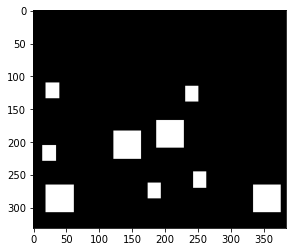

In [51]:
plot(np.intersect1d(nonholes, rectangles), "rectangles with no holes")

Plotting: circles with holes
Total count: 4


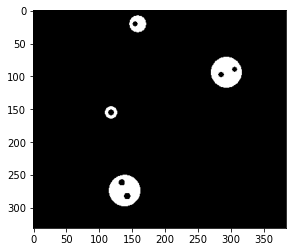

In [52]:
plot(np.intersect1d(holes, circles), "circles with holes")

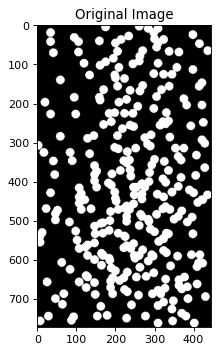

In [53]:
figure(figsize=(8, 5), dpi=80)
img = cv2.imread('../imgs/circles.jpg', 0)
img = (img > 127).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

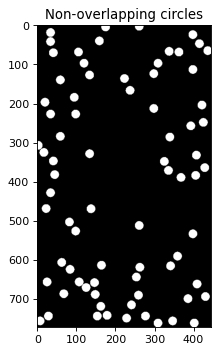

In [54]:
vis = np.zeros(img.shape)

color=0
n = img.shape[0]
m = img.shape[1]

def dfs(x, y):
    if (x<0 or x>=n or y<0 or y>=m or img[x][y]==0 or vis[x][y]!=0):
        return 0
    else:
        vis[x][y]=color
        ans = 1
        ans += dfs(x+1, y)
        ans += dfs(x-1, y)
        ans += dfs(x, y+1)
        ans += dfs(x, y-1)
        return ans
        
res = np.zeros(img.shape, dtype=np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if vis[i][j]==0 and img[i][j]==1:
            color+=1
            val = dfs(i, j)
            if val<500:
                gg = (vis==color)
                gg = gg.astype(np.uint8)
                res += gg
                
figure(figsize=(8, 5), dpi=80)
plt.imshow(res, cmap='gray')
plt.title('Non-overlapping circles')
plt.show()

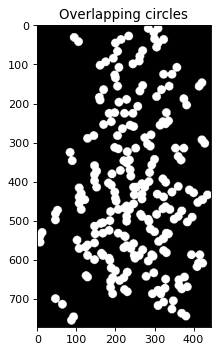

In [55]:
figure(figsize=(8, 5), dpi=80)
plt.imshow(img-res, cmap='gray')
plt.title('Overlapping circles')
plt.show()

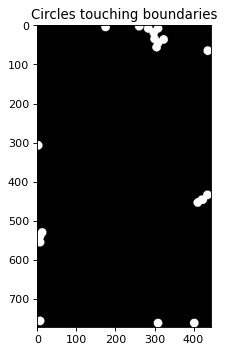

In [56]:
vis = np.zeros(img.shape)

n = img.shape[0]
m = img.shape[1]

def dfs(x, y):
    if (x<0 or x>=n or y<0 or y>=m or img[x][y]==0 or vis[x][y]!=0):
        return
    else:
        vis[x][y]=1
        dfs(x+1, y)
        dfs(x-1, y)
        dfs(x, y+1)
        dfs(x, y-1)

for i in range(img.shape[0]):
    dfs(i, 0)
    dfs(i, img.shape[1]-1)
    
for i in range(img.shape[1]):
    dfs(0, i)
    dfs(img.shape[0]-1, i)
                
figure(figsize=(8, 5), dpi=80)
plt.imshow(vis, cmap='gray')
plt.title('Circles touching boundaries')
plt.show()

In [58]:
img.shape/2

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'